In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Postgres Connection Information
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


houseprices_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


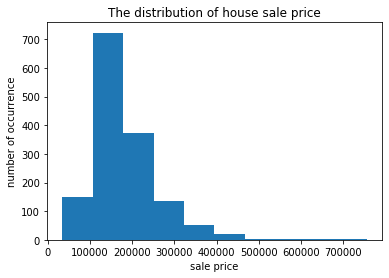

In [4]:
plt.hist(houseprices_df.saleprice)
plt.title("The distribution of house sale price")
plt.xlabel("sale price")
plt.ylabel("number of occurrence")
plt.show()

In [5]:
houseprices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [43]:
# Encoding categorical data
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

df_subset = houseprices_df.select_dtypes(exclude=[np.number])
df_subset2 = houseprices_df.select_dtypes(include=[np.number])

for col in df_subset:
    df_subset[col] = pd.get_dummies(df_subset[col], drop_first = True)

df = pd.concat([df_subset, df_subset2], axis=1)
    
X = df.iloc[:, :-1]
y = df.saleprice

In [119]:
import statsmodels.api as sm

X = sm.add_constant(X)
X_opt = X.drop(columns=['fence', 'bsmtfinsf2', 'bsmtunfsf', 'bsmthalfbath', 'poolqc', 'openporchsf', 'fireplacequ', 'salecondition',
                        'miscval', 'bsmtfintype2', 'housestyle', 'bsmtcond', 'extercond', 'yrsold', 'bsmtqual', 'mosold',
                       'exterior1st', 'exterior2nd', 'bsmtfintype1', 'miscfeature', 'exterqual', 'neighborhood',
                       'landslope', 'foundation', 'lowqualfinsf', 'garageyrblt', 'heating', 'utilities',
                       'condition2', 'centralair', 'heatingqc', 'electrical', 'garagecond', 'garagearea', 
                       'garagequal', 'firstflrsf', 'secondflrsf', 'halfbath', 'paveddrive', 'saletype', 'id',
                       'enclosedporch', 'garagefinish', 'landcontour'])
 
regressor_OLS = sm.OLS(y, X_opt, missing='drop').fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     155.8
Date:                Sat, 30 Nov 2019   Prob (F-statistic):               0.00
Time:                        02:43:10   Log-Likelihood:                -14178.
No. Observations:                1195   AIC:                         2.843e+04
Df Residuals:                    1158   BIC:                         2.862e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.103e+06   1.41e+05     -7.809